# Titanic Logistic Regression
https://www.kaggle.com/c/titanic

In [57]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline() #iplot(kind)

In [58]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [59]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Exploratory data analysis

Using seaborn to find where most our missing data is


<Axes: >

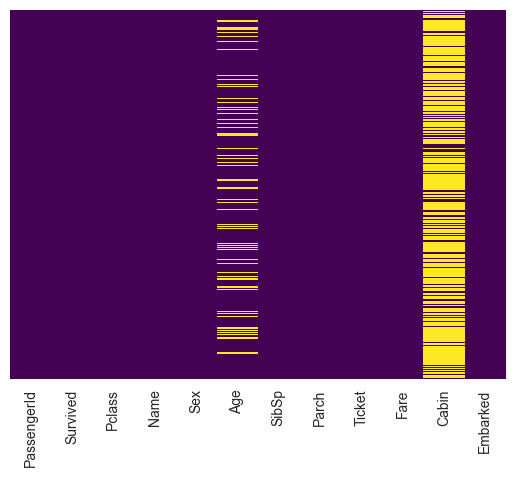

In [60]:
#train.isnull() #shows True if null, False if not null

sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Every yellow line is a NULL value.
 - From this we can see we are missing a LOT of cabin data, to much missing, so we might need to drop it or change it
 - Embarked we are missing only like one
 - Age we missing about 20% so we can use other columns knowledge to fill it in 

In [61]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

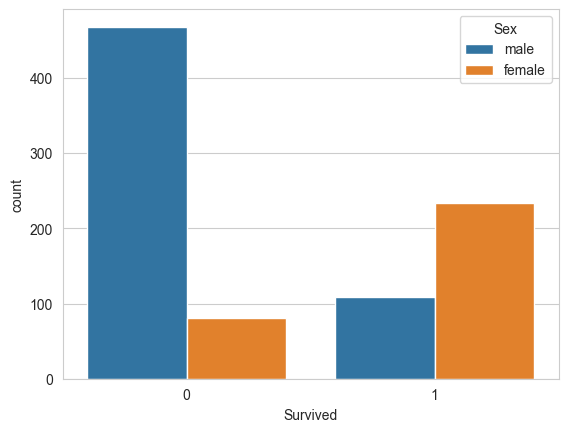

In [62]:
#train['Survived'].value_counts()

sns.countplot(data=train, x='Survived', hue='Sex')
#less survived than died

<Axes: xlabel='Survived', ylabel='count'>

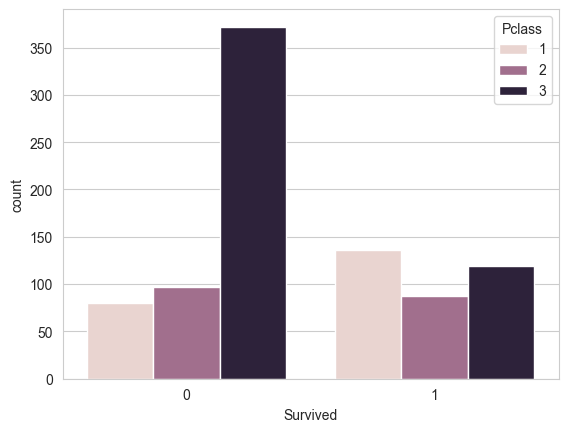

In [63]:
sns.countplot(data=train, x='Survived', hue='Pclass')

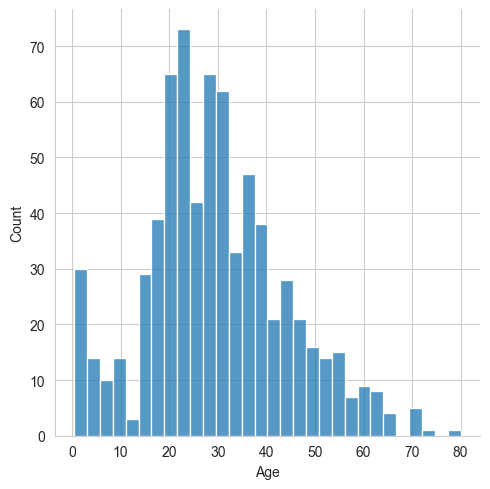

In [64]:
sns.displot(train['Age'].dropna(), bins=30)
#dropna so it doesnt mess it up

#train['Age'].plot.hist(bins=30)

In [65]:
train.info()

#SibSp is siblings and spause

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

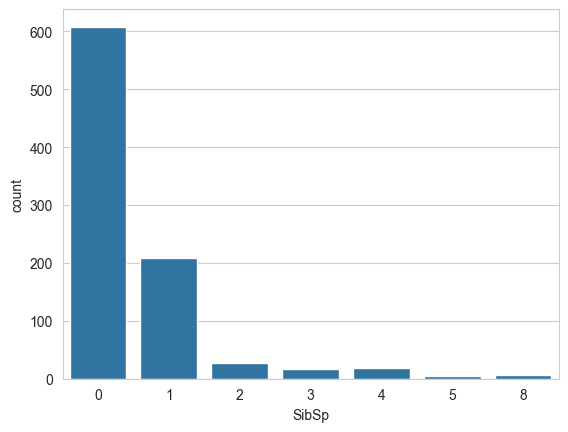

In [66]:
sns.countplot(x='SibSp', data=train)

In [67]:
import cufflinks as cf
cf.go_offline()

In [68]:
train['Fare'].iplot(kind='hist',bins=40)

<Axes: xlabel='Pclass', ylabel='Age'>

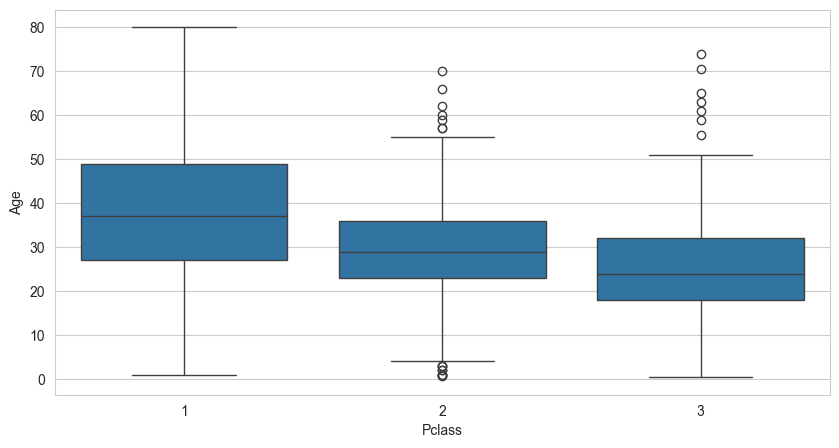

In [69]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Pclass', y='Age', data=train)

## Cleaning Data Frame
Imputation (filling in with average)

In [70]:
class_age_mean = train.groupby('Pclass')['Age'].mean()
class_age_mean

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [71]:
def missing_age(row):
    if pd.isnull(row['Age']):
        Pclass = row['Pclass']
        return class_age_mean[Pclass] #return the average from new df where class is same
    else:
        return row['Age']
    
train['Age'] = train.apply(missing_age, axis=1)

In [72]:
#one line sub, group them all together and then fill in from each group
#train['age'] = train.groupby('class')['age'].transform(lambda x: x.fillna(x.mean()))

In [73]:
#remove cabin too many missing
train.drop('Cabin', axis=1, inplace=True)

<Axes: >

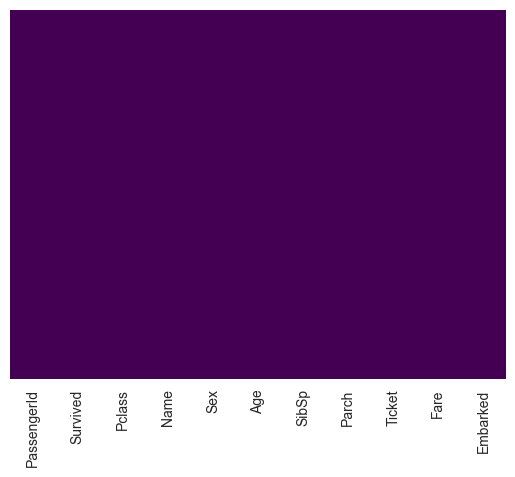

In [74]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [75]:
#replace all other missing values that we might not see
train.dropna(inplace=True)

## Formatting categorical columns
The categoricals like male / female, we need to turn into True/False or 1-0 as ML program cant read words using dummy variables

In [76]:
sex = pd.get_dummies(train['Sex'], drop_first=True, dtype=float)

#dropped C column as there cant be any perfect predictors, and if not Q and S then its C
embark = pd.get_dummies(train['Embarked'], drop_first=True, dtype=int) # C Q S


#drop first drops first column. since we dont need both

#one column, is perfect predictor of other, if one if false other is true

In [77]:
sex.head(3)

,male
0,1.0
1,0.0
2,0.0


In [78]:
embark.head(3)

,Q,S
0,0,1
1,0,0
2,0,1


In [79]:
train = pd.concat([train,sex,embark], axis=1) #axis 1 to add in as new columns to the train columns

In [80]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,1.0,0,1


drop all non categorical columns and we dont need passanger ID

In [81]:
train.drop(['PassengerId', 'Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

All concainated numerical columns

In [82]:
train.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1.0,0,1
1,1,1,38.0,1,0,71.2833,0.0,0,0
2,1,3,26.0,0,0,7.9250,0.0,0,1


Saving data to use in other file

In [83]:
train.to_csv('train_cleaned.csv', index=False)